# 데이터 처리 및 가시화

**강좌**: *수치해석 프로젝트*

## 주요 패키지
- `matplotlib` 패키지 : 2차원 그래픽에서 널리 활용되는 파이썬 패키지
- `pandas` 패키지 : 데이터 분석 라이브러리

**참고**
* https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
* https://matplotlib.org/stable/gallery/index.html

## `matplotlib` 패키지
### 불러오기
- Jupyter 노트북 내 실행을 위한 매직 커맨드 
    - `%matplotlib inline` 또는 `%matplotlib notebook`
- `pyplot` 모듈 불러오기
    - Matlab과 비슷하게 그래프를 그릴 수 있는 interface
- 그래프 스타일 로드
    - 참고 : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
- 그림 DPI 조절

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

### Sine / Cosine 그래프 그리기 예제
- 각도 단위는 Radian 임
   - `deg2rad`, `rad2deg` 로 변환
   
- $(-\pi, \pi)$ 사이에서 그래프 그리기

In [2]:
import numpy as np

theta = 90
np.cos(np.deg2rad(theta))

6.123233995736766e-17

In [3]:
# 256개 간격으로 x 나눔
X = np.linspace(-np.pi, np.pi, 256)

# Cosine / Sine 함수
C, S = np.cos(X), np.sin(X)

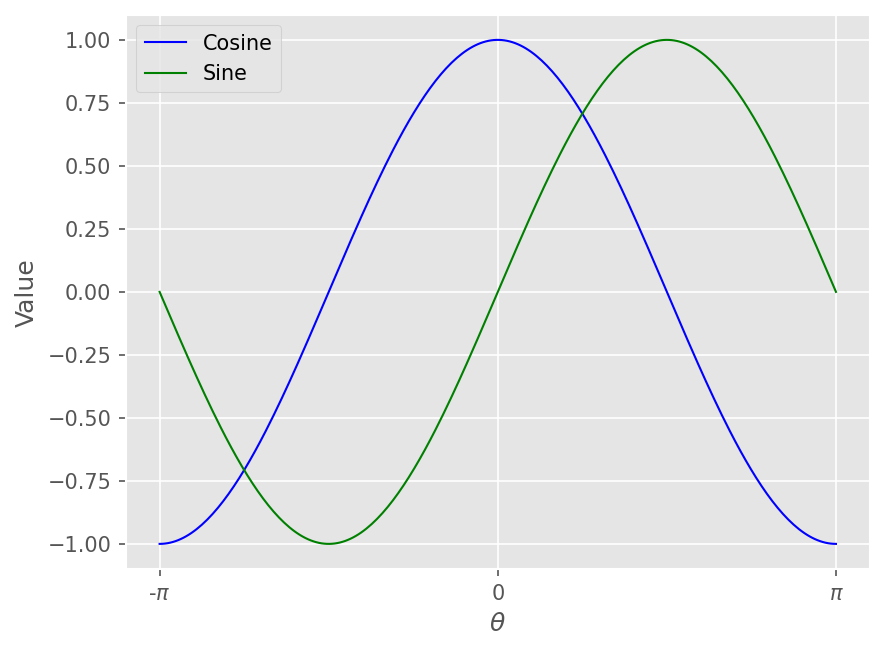

In [4]:
# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Label 추가
plt.xlabel(r"$\theta$")
plt.ylabel('Value')

# Tick 추가
plt.xticks([-np.pi, 0, np.pi], [r"-$\pi$", 0, r"$\pi$"])

# Legend 추가
plt.legend(['Cosine', 'Sine'])

## `pandas` 패키지
### 불러오기
- ``import pandas as pd`` 로 불러온다

### 자료 구조
- Series, DataFrame으로 연속적인 데이터 처리가 가능함
- `csv`, `json`, `excel` 등 다양한 파일을 읽을 수 있음
   * ``pd.read_csv``, ``pd.read_json``, ``pd_read_excel``
   * CSV 파일이란: https://ko.wikipedia.org/wiki/CSV_(%ED%8C%8C%EC%9D%BC_%ED%98%95%EC%8B%9D)

In [5]:
# Pandas 로드
import pandas as pd

### Space X 비행 자료 분석
- 비행체 발사 시 각종 비행 정보 및 계측 데이터를 지상으로 보냄
   * Telemetry is the in situ collection of measurements or other data at remote points and their automatic transmission to receiving equipment (telecommunication) for monitoring   
- Space X 발사 중계 화면에서 관련 정보를 추출하는 코드
   * https://github.com/shahar603/Telemetry-Data
- Space X CRS9 발사 자료
   * https://github.com/shahar603/Telemetry-Data/tree/master/SpaceX%20CRS-9

In [6]:
# CRS9 자료 읽기
crs9 = pd.read_json('https://raw.githubusercontent.com/shahar603/Telemetry-Data/master/SpaceX%20CRS-9/JSON/analysed.json')

In [7]:
# 데이터 자료 크기
print(crs9.shape)

# 데이터 첫부분
crs9.head()

(440, 9)


time  velocity  altitude  velocity_y  velocity_x  acceleration  \
0     0     0.000     0.000       0.000         0.0        10.502   
1     1     2.832     0.002       2.476         0.0        11.001   
2     2     3.832     0.005       4.202         0.0        11.508   
3     3     5.271     0.009       6.162         0.0        12.002   
4     4     8.038     0.016       8.490         0.0        12.402   

   downrange_distance  angle          q  
0                 0.0   90.0   0.000000  
1                 0.0   90.0   4.911422  
2                 0.0   90.0   8.988008  
3                 0.0   90.0  17.000633  
4                 0.0   90.0  39.516119

In [8]:
# 각 컬럼 이름 출력
print(crs9.columns)

# 각 컬럼 특성
crs9.describe()

Index(['time', 'velocity', 'altitude', 'velocity_y', 'velocity_x',
       'acceleration', 'downrange_distance', 'angle', 'q'],
      dtype='object')


time     velocity    altitude   velocity_y   velocity_x  \
count  440.000000   440.000000  440.000000   440.000000   440.000000   
mean   219.500000  1794.012536  116.162252   481.673602  1634.273132   
std    127.161315  1145.939317   78.907506   332.028161  1232.547816   
min      0.000000     0.000000    0.000000    -8.026000    -0.897000   
25%    109.750000   835.914250   29.638250   191.436000   473.329250   
50%    219.500000  1700.613000  133.024500   430.599000  1508.775000   
75%    329.250000  2578.719250  194.122750   756.319000  2554.734750   
max    439.000000  4256.990000  211.854000  1140.251000  4256.990000   

       acceleration  downrange_distance       angle             q  
count    440.000000          440.000000  440.000000    440.000000  
mean      14.367682          204.791648   34.702305   3215.724452  
std        6.337356          211.012820   29.634832   6840.746659  
min        0.095000           -0.003000   -0.109000      0.000000  
25%        9.898750           11.621750    7.779000      0.000000  
50%       13.415500          132.917500   27.463500      0.000000  
75%       16.418000          351.714250   55.487500    364.876881  
max       34.624000          716.952000   90.000000  22634.274976

In [9]:
# 'time' 컬럼을 index 로 설정
crs9 = crs9.set_index('time')

crs9.head()

velocity  altitude  velocity_y  velocity_x  acceleration  \
time                                                             
0        0.000     0.000       0.000         0.0        10.502   
1        2.832     0.002       2.476         0.0        11.001   
2        3.832     0.005       4.202         0.0        11.508   
3        5.271     0.009       6.162         0.0        12.002   
4        8.038     0.016       8.490         0.0        12.402   

      downrange_distance  angle          q  
time                                        
0                    0.0   90.0   0.000000  
1                    0.0   90.0   4.911422  
2                    0.0   90.0   8.988008  
3                    0.0   90.0  17.000633  
4                    0.0   90.0  39.516119

Text(0, 0.5, 'Velocity (m/s)')

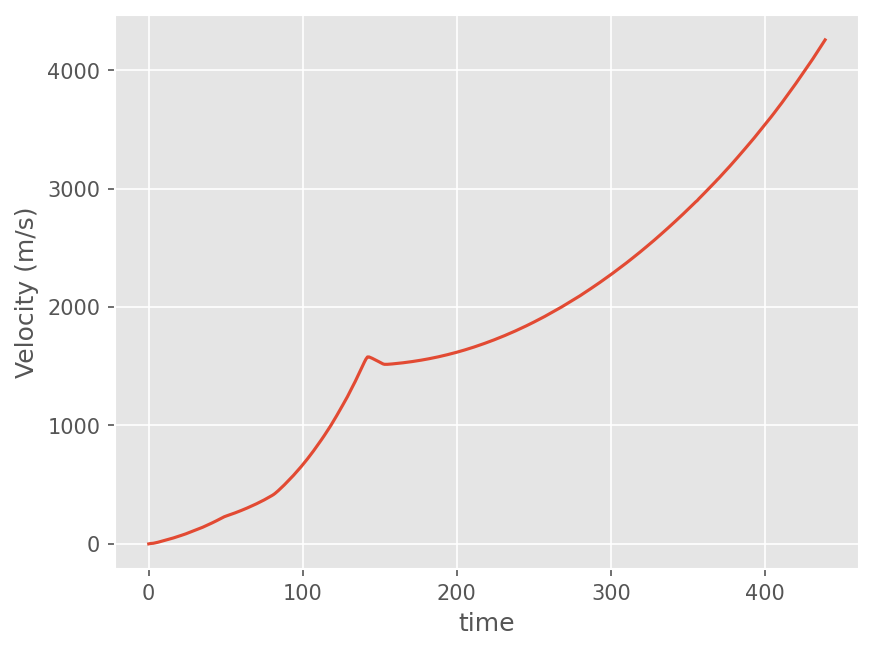

In [10]:
# 주요 자료 가시화
crs9['velocity'].plot()
plt.ylabel('Velocity (m/s)')

Text(0, 0.5, 'Acceleration ($m/s^2$)')

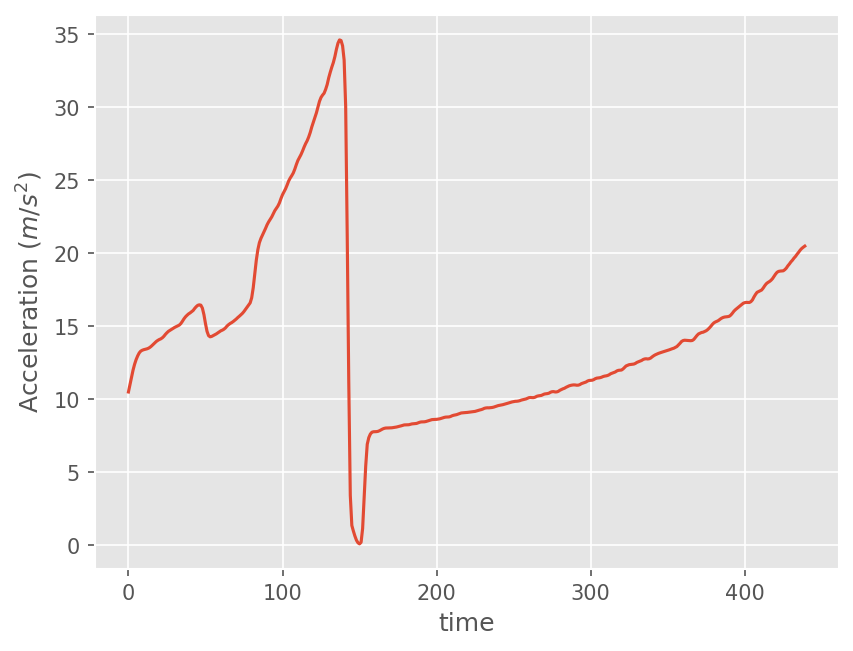

In [11]:
crs9['acceleration'].plot()
plt.ylabel(r"Acceleration ($m/s^2$)")

Text(0, 0.5, 'Angle ($^\\circ$)')

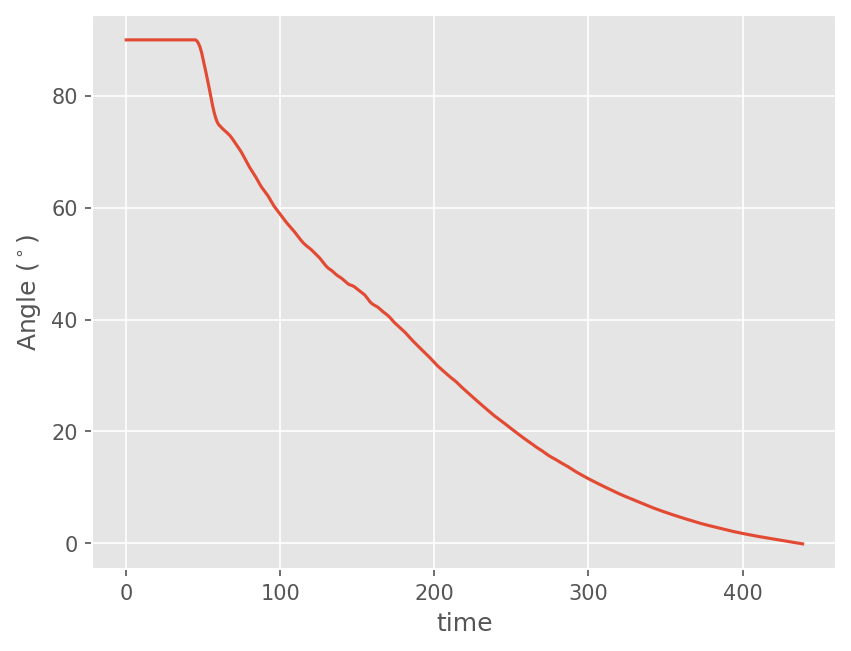

In [12]:
crs9['angle'].plot()
plt.ylabel(r"Angle ($^\circ$)")

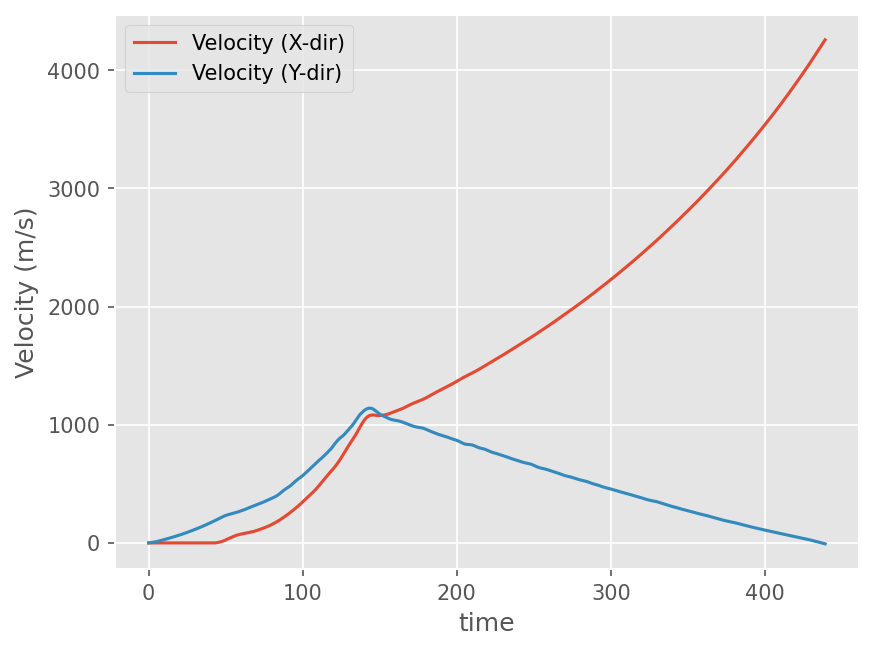

In [13]:
# 여러 그래프 가시화
fig, ax = plt.subplots()
crs9['velocity_x'].plot(ax=ax)
crs9['velocity_y'].plot(ax=ax)

ax.set_ylabel('Velocity (m/s)')
ax.legend(['Velocity (X-dir)', 'Velocity (Y-dir)'])

(-5.0, 45.0)

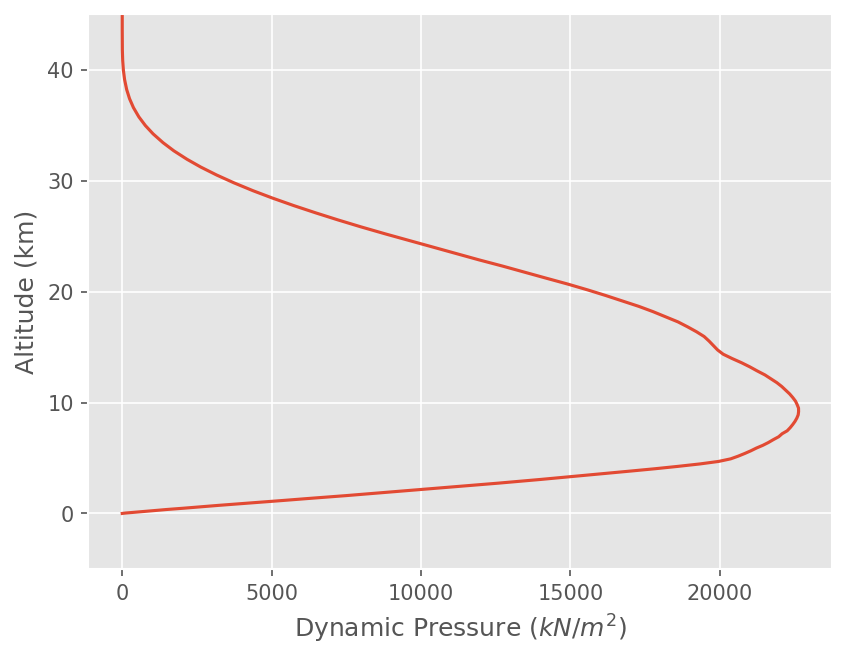

In [14]:
# 고도별 동압 가시화
plt.plot(crs9['q'], crs9['altitude'])
plt.xlabel(r'Dynamic Pressure ($kN/m^2$)')
plt.ylabel('Altitude (km)')
plt.ylim(-5, 45)

In [15]:
# 최대 동압 지점 찾기
t_qmax = crs9['q'].idxmax()
crs9.loc[t_qmax]

velocity                315.143000
altitude                  9.189000
velocity_y              302.010000
velocity_x               89.864000
acceleration             15.194000
downrange_distance        1.094000
angle                    73.240000
q                     22634.274976
Name: 66, dtype: float64

Text(66, 100, 'Max-Q')

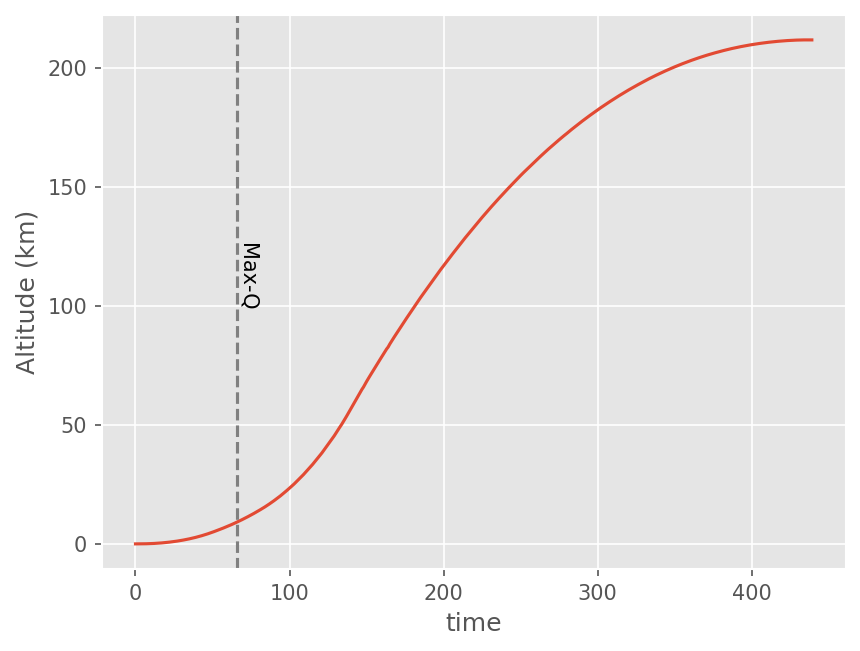

In [16]:
crs9['altitude'].plot()
plt.ylabel("Altitude (km)")

# Draw Max Q line
plt.axvline(t_qmax, linestyle='--', color='gray')
plt.text(t_qmax, 100,'Max-Q', rotation=-90)

#### 데이터 분석
- 대기 밀도 계산
    * $q = \frac{1}{2} \rho V^2$ , 그러므로 $\rho = \sqrt{\frac{2q}{V^2}}$

In [17]:
# 밀도 계산
crs9['rho'] = np.sqrt(2*crs9['q'] / crs9['velocity']**2)

(-5.0, 45.0)

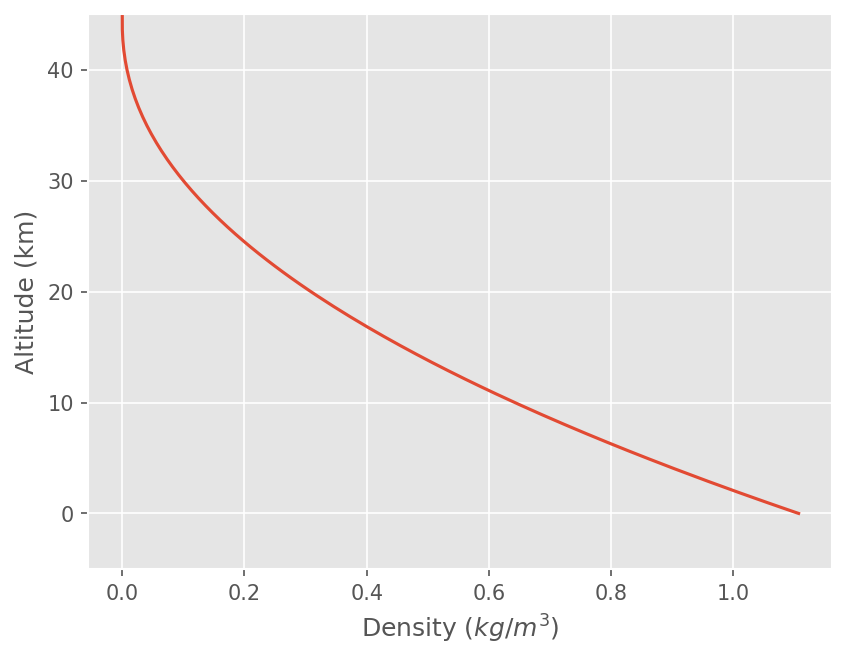

In [18]:
# 고도별 밀도 가시화
plt.plot(crs9['rho'], crs9['altitude'])
plt.xlabel(r'Density ($kg/m^3$)')
plt.ylabel('Altitude (km)')
plt.ylim(-5, 45)